In [50]:
import numpy as np
import pylab as plt
import scipy
import scipy.stats
import json
%matplotlib inline

In [51]:
import json

seek_f = open('./seek-notebook-data-json20171117-15106-oie3mw.json')
# now read the file
seek_f_content = seek_f.read();
seek_f_json = json.loads(seek_f_content);

# print for debugging purposes. Also interesting for the user, so leave in.
print(seek_f_json)



{'test': 'ttest', 'action': 'pythonize', 'marked': {'1': {'values': ['bl 25 mg', '3579.76865166576', '3489.49364276611', '3622.63287399187', '2530.12322573658', '3482.7076427172', '3466.8037901986', '3486.41606430717', '3435.16084892502', '3461.64664163952', '3604.1883915461', '3518.27795405577', '3426.10704898731', '3455.01629224461', '3484.60905482305', '3520.84179840152', '3416.15849110057', '3544.47371525755', '3688.44709982481', '3609.72282398433', '3558.51627051362', '3570.71474428701', '3373.610418502', '3537.85309016321', '3498.22759836998', '3529.00269382451'], 'key': 'D'}, '0': {'values': ['bl Kontrolle', '3533.05678872751', '3557.76737165814', '3582.55051616598', '3610.76495807908', '3588.32085681936', '3574.36786279139', '3612.17146696808', '3580.12178917346', '3510.34228960713', '3615.39116955649', '3534.86044754588', '3490.74082979899', '3549.49346303324', '3499.22072982818', '3626.74720386966', '3566.77773842558', '3472.79261886378', '3518.99438383347', '3553.56039601659

In [52]:
# unfortunately, js ships the JSON as strings
# so we have to find out which integers are our array indices
in_keys = seek_f_json["marked"].keys()

out_keys = list()
for i in in_keys:
    out_keys.append(int(i))
    
# Again: print to cell in order to simplify debugging
print(out_keys)

[1, 0]


In [53]:
def float_if(x):
    if(x):
        return float(x)
    else:
        return(0)    
    
def is_float(x):
    try:
        _ = float(x)
        return True;
    except ValueError:
        return False;
 

In [54]:
title1 = seek_f_json["marked"]["%d" % out_keys[0]]["key"];
title2 = seek_f_json["marked"]["%d" % out_keys[1]]["key"];
if(not is_float(seek_f_json["marked"]["%d" % out_keys[0]]["values"][0])):
    title1 = seek_f_json["marked"]["%d" % out_keys[0]]["values"][0];
if(not is_float(seek_f_json["marked"]["%d" % out_keys[1]]["values"][0])):
    title2 = seek_f_json["marked"]["%d" % out_keys[1]]["values"][0];



In [55]:
print(seek_f_json["marked"]["%d" % out_keys[0]]["values"][0])

bl 25 mg


In [56]:
# Now turn the string values from the array into double values
for (i,j) in seek_f_json["marked"].items():
    seek_f_json["marked"][i]["values"] = list(map(float_if,filter(is_float,j["values"])))

In [57]:


# now, get out the relevant data for the t-test
data1 =  seek_f_json["marked"]["%d" % out_keys[0]]["values"];
data2 =  seek_f_json["marked"]["%d" % out_keys[1]]["values"];


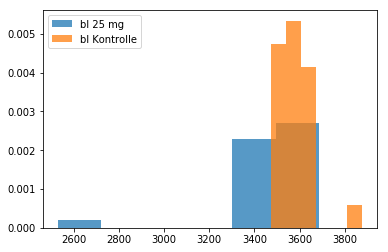

In [58]:
# plot, if useful
data1 = np.fromiter(data1, np.float)
data2 = np.fromiter(data2, np.float)
n, bins, patches = plt.hist(data1, int(len(data1)/4), normed=1, histtype='stepfilled', alpha=0.75, label=title1)
n2, bins2, patches2 = plt.hist(data2, int(len(data2)/4), normed=1, histtype='stepfilled', alpha=0.75, label=title2)
plt.legend()



#### Was the data sampled from the same distribution?

In [59]:
tstat, pval = scipy.stats.ttest_ind(data1, data2)[:2]
pval = '< 0.01' if pval < 0.01 else round(pval,3)
print('='*32, '\nt-statistic:\t', round(tstat,3), '\np-value:\t', pval, '\n'+'='*32)

t-statistic:	 -2.324 
p-value:	 0.024 
